In [ ]:
import tensorflow as tf
import numpy as np

# **MSE**  
  
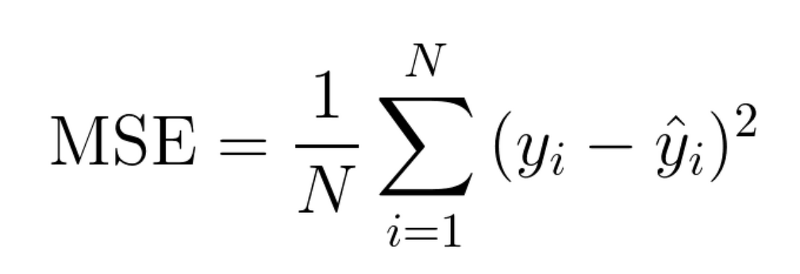
  
  <br/><br/>

# **Gradient Descent**  
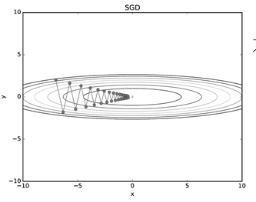
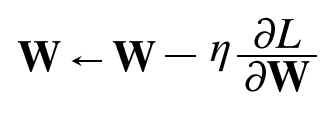  
  **w = w - lr * (aLoss/aw)**  
  **bias** computation is the same as calculating weight

In [ ]:
class Node:
    def __init__(self):
        self.w = tf.Variable(tf.random.normal([2, 1]))
        self.b = tf.Variable(tf.random.normal([1, 1]))
        
    def __call__(self, x):
        return self.preds(x)
    
    def preds(self,x):
        # forward propagation
        out = tf.matmul(x,self.w)
        out = tf.add(out, self.b)
        out = tf.nn.sigmoid(out)
        return out
    
    def loss(self,y_pred, y):
        return tf.reduce_mean(tf.square(y_pred - y)) # using MSE(Mean Square Error)
   
    def train(self, inputs, outputs, learning_rate):
        epochs = range(10000)
        for i, epoch in enumerate(epochs):
            with tf.GradientTape() as t: # Gradient descent
                current_loss = self.loss(self.preds(inputs), outputs) # Loss
                if i % 1000 == 0:
                    print(str(i) + " epoch, loss: "+str(current_loss.numpy()))
                # back propagation
                dW, db = t.gradient(current_loss, [self.w, self.b]) # aLoss/aw, aLoss/ab 
                self.w.assign_sub(learning_rate * dW) # w = w - lr * (aLoss/aw)
                self.b.assign_sub(learning_rate * db)

In [ ]:
# AND operation
inputs = tf.constant([[0.0,0.0], [0.0,1.0], [1.0,0.0], [1.0,1.0]])
outputs = tf.constant([[0.0], [0.0], [0.0], [1.0]])

node = Node()
# train
node.train(inputs, outputs, 0.01)
# test
assert node([[0.0,0.0]]).numpy()[0][0] < 0.5 # AssertError if the condition is not True.
assert node([[0.0,1.0]]).numpy()[0][0] < 0.5
assert node([[1.0,0.0]]).numpy()[0][0] < 0.5
assert node([[1.0,1.0]]).numpy()[0][0] >= 0.5

0 epoch, loss: 0.26536
1000 epoch, loss: 0.14495385
2000 epoch, loss: 0.11706426
3000 epoch, loss: 0.09991877
4000 epoch, loss: 0.087699786
5000 epoch, loss: 0.0784657
6000 epoch, loss: 0.07114057
7000 epoch, loss: 0.06511263
8000 epoch, loss: 0.060019903
9000 epoch, loss: 0.055635765


In [ ]:
# OR operation
inputs = tf.constant([[0.0,0.0], [0.0,1.0], [1.0,0.0], [1.0,1.0]])
outputs = tf.constant([[0.0], [1.0], [1.0], [1.0]])

node = Node()
# train
node.train(inputs, outputs, 0.01)
# test
assert node([[0.0,0.0]]).numpy()[0][0] < 0.5
assert node([[0.0,1.0]]).numpy()[0][0] >= 0.5
assert node([[1.0,0.0]]).numpy()[0][0] >= 0.5
assert node([[1.0,1.0]]).numpy()[0][0] >= 0.5

0 epoch, loss: 0.14340064
1000 epoch, loss: 0.11086227
2000 epoch, loss: 0.092487514
3000 epoch, loss: 0.07848688
4000 epoch, loss: 0.067566074
5000 epoch, loss: 0.0589306
6000 epoch, loss: 0.051988725
7000 epoch, loss: 0.04631786
8000 epoch, loss: 0.041618295
9000 epoch, loss: 0.037674643


In [ ]:
print("Node Weights: ",node.w.numpy())
print("Node Bias: ",node.b.numpy())

Node Weights:  [[2.475967 ]
 [2.5885937]]
Node Bias:  [[-0.905723]]
